# PRODIGY_ML_04

Develop a hand gesture recognition model in macihne learning that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.

### Libraries :

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.models import load_model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

### Dataset :

In [2]:
train_dir = r'C:\Users\KARTHIK\OneDrive\Desktop\ALL FILES\RESUME\train\train'
test_dir = r'C:\Users\KARTHIK\OneDrive\Desktop\ALL FILES\RESUME\test\test'

### Preprocessing :

In [3]:
# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

In [4]:
# Load and preprocess the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 18000 images belonging to 20 classes.


In [5]:
# Load and preprocess the test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 6000 images belonging to 20 classes.


### Modeling :

In [6]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/50
562/562 [==============================] - 174s 305ms/step - loss: 0.7945 - accuracy: 0.7380 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 2/50
562/562 [==============================] - 67s 119ms/step - loss: 0.2180 - accuracy: 0.9265 - val_loss: 0.0074 - val_accuracy: 0.9993
Epoch 3/50
562/562 [==============================] - 142s 252ms/step - loss: 0.1491 - accuracy: 0.9502 - val_loss: 0.0074 - val_accuracy: 0.9988
Epoch 4/50
562/562 [==============================] - 173s 307ms/step - loss: 0.1203 - accuracy: 0.9600 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 5/50
562/562 [==============================] - 70s 124ms/step - loss: 0.0906 - accuracy: 0.9692 - val_loss: 6.0253e-04 - val_accuracy: 1.0000
Epoch 6/50
562/562 [==============================] - 70s 124ms/step - loss: 0.0819 - accuracy: 0.9730 - val_loss: 0.0011 - val_accuracy: 0.9998
Epoch 7/50
562/562 [==============================] - 69s 122ms/step - loss: 0.0686 - accuracy: 0.9765 - val_loss: 0.0015 -

### Testing :

In [8]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

188/188 [==============================] - 5s 26ms/step - loss: 0.0020 - accuracy: 0.9988
Test Accuracy: 99.88%


In [14]:
model.save('hand_gesture_model.h5')

### Predict :

In [30]:
model = load_model('hand_gesture_model.h5')

In [31]:
class_labels = sorted(os.listdir(r'C:\Users\KARTHIK\OneDrive\Desktop\ALL FILES\RESUME\train\train'))

In [32]:

def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"Image not found or unable to read: {img_path}")
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Input Image')
    plt.axis('off')
    plt.show()

    img = cv2.resize(img, (64, 64))
    img = img / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img


In [33]:
def predict_gesture(img_path, model):
    """
    Predict the gesture from the image using the trained model.
    """
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]
    return predicted_label

Checking if image exists at: C:\Users\KARTHIK\OneDrive\Desktop\ALL FILES\RESUME\test\test\3\903.jpg


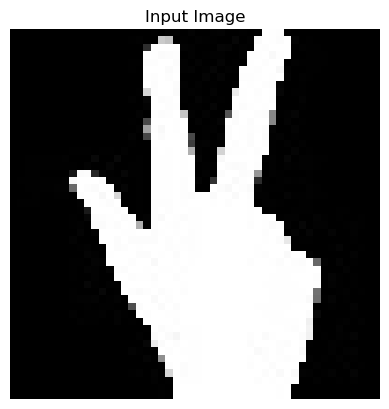

1/1 [==============================] - 0s 100ms/step
Predicted Gesture: 3


In [34]:
image_path = r"C:\Users\KARTHIK\OneDrive\Desktop\ALL FILES\RESUME\test\test\3\903.jpg"  # Replace with the path to the user-provided image
print(f"Checking if image exists at: {image_path}")

predicted_gesture = predict_gesture(image_path, model)
print(f'Predicted Gesture: {predicted_gesture}')
